## Team Members
- Archit Dilip Dukhande
- Sharif Bey
- Harika Gangu



## Project Goal
To analyze remote Data/ML job trends across:
- Live data via Remotive API
- Historical data from Hacker News (2020–2024)

We identify:
- In-demand job titles & skills
- Salary trends
- NLP-based skill extraction
- Year-over-year trends


## Section 1: Live Remote Jobs from Remotive API

#### Step 1:  Import Libraries & Fetch Remotive Job Data
Imports all the required Python libraries and fetches live job data from the Remotive API.

The code starts by importing libraries for data processing (pandas), visualization (matplotlib), NLP (spaCy), web requests (requests), and utilities like regex and datetime operations. The pre-trained en_core_web_sm model from spaCy is loaded to support later text analysis.

Next, a GET request is made to the Remotive API to retrieve a JSON response containing remote job listings. The relevant data is extracted into a pandas DataFrame for further analysis. A preview of selected columns (job title, company, tags, salary, etc.) provides a quick look at the data structure.

In [ ]:
#import sys
#!{sys.executable} -m pip install requests pandas matplotlib nltk spacy beautifulsoup4




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#import sys
#!{sys.executable} -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---- ----------------------------------- 1.6/12.8 MB 13.9 MB/s eta 0:00:01
     --------------------- ------------------ 6.8/12.8 MB 20.0 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 23.2 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 21.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Step 1: Import Libraries & Fetch Data
import requests
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import spacy
from datetime import datetime, timedelta

# Load NLP model
nlp = spacy.load("en_core_web_sm")

# Fetch data from Remotive API
url = "https://remotive.com/api/remote-jobs"
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
data = response.json()
df = pd.DataFrame(data['jobs'])

# Preview structure
df[['title', 'company_name', 'category', 'tags', 'job_type', 'salary', 'publication_date']].head()


,title,company_name,category,tags,job_type,salary,publication_date
0,Recruiter,Federato,Human Resources,"[salesforce, AI/ML, editing, ATS, diversity, i...",full_time,,2025-04-21T00:50:26
1,Implementation Manager,Procore Technologies,Customer Service,[onboarding],full_time,"$42,840 - $58,905 plus commission",2025-04-21T00:50:19
2,Director of Product,GeneDX,Product,"[product management, healthcare, service design]",full_time,"$183,644 - $229,580 usd",2025-04-20T22:50:25
3,GTM Operations Manager,Paddle,Sales / Business,"[marketing automation, sales operations]",full_time,,2025-04-20T22:50:19
4,Strategic Partnerships & Growth Lead,Bright,Sales / Business,[business development],full_time,,2025-04-20T20:50:37


#### Step 2: Filter for Data/ML Jobs & Analyze Common Titles
Filters the job listings for Data and Machine Learning roles and visualizes the most commonly posted job titles.

The code searches the title column of the job listings using a case-insensitive match for keywords like “data”, “machine learning”, “ml”, “ai”, and “analytics”. This isolates roles specifically related to Data Science, ML, and AI.

After filtering, the top 10 most frequent job titles are identified and plotted using a horizontal bar chart. This visualization helps highlight which specific job titles are currently trending in the remote Data/ML space.


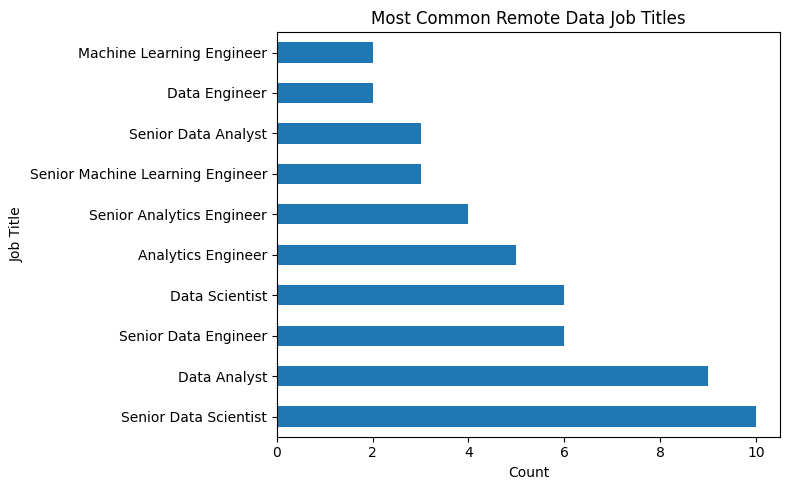

In [2]:
# Step 2: Filter for Data/ML Jobs & Analyze Titles
df_data = df[df['title'].str.contains('data|machine learning|ml|ai|analytics', case=False)]
top_titles = df_data['title'].value_counts().head(10)

top_titles.plot(kind='barh', title="Most Common Remote Data Job Titles", figsize=(8, 5))
plt.xlabel("Count"); plt.ylabel("Job Title"); plt.tight_layout(); plt.show()


#### Step 3: Extract Skills from Tags & Descriptions
Extracts and visualizes the most in-demand technical skills (tags) from the filtered remote Data/ML job listings.

Each job listing in the filtered dataset includes a tags field, which contains keywords representing required tools or technologies (e.g., Python, SQL, AWS). This step flattens the tags into a single list and uses Python’s Counter to identify the 15 most frequently mentioned skills.

A bar chart is then plotted to show which tags are most common across Data/ML remote roles. This helps job seekers understand which technical skills are currently in highest demand.

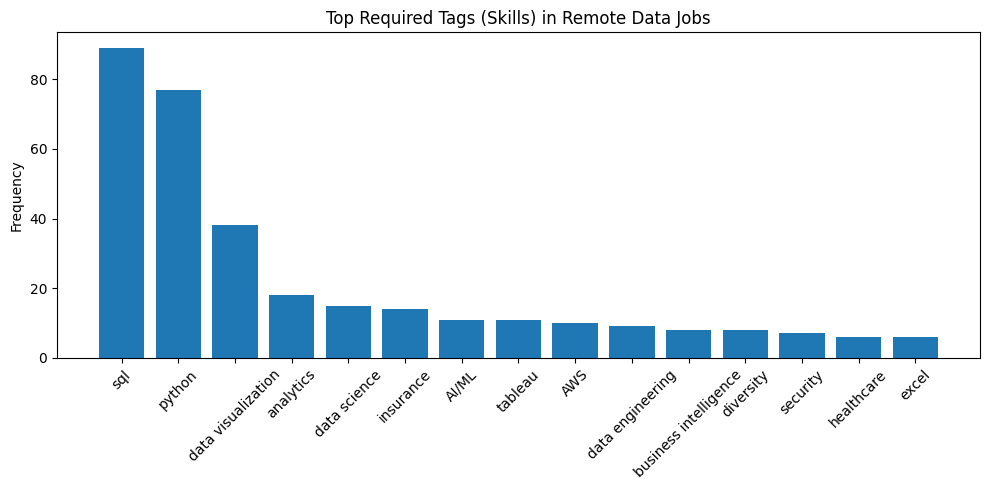

In [3]:
# Step 3: Extract Skills from Tags & Descriptions (NLP)
all_tags = [tag for tags in df_data['tags'] for tag in tags]
tag_counts = Counter(all_tags).most_common(15)

skills, counts = zip(*tag_counts)
plt.figure(figsize=(10,5))
plt.bar(skills, counts)
plt.xticks(rotation=45)
plt.title("Top Required Tags (Skills) in Remote Data Jobs")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### Step 4: Salary Trend Analysis

Parses salary information from remote Data/ML jobs and visualizes the distribution using a histogram.

Many salary entries are stored as text and may contain ranges or formatting (e.g., "$80,000 - $120,000"). This step defines a parse_salary() function that uses regex to extract numeric values from the salary string and calculates the average when a range is present.

The dataset is then filtered to keep only job listings with non-empty salary fields, and those entries are parsed into numeric values. Finally, a histogram is plotted to show the distribution of salaries, offering insight into the typical pay range for remote Data/ML roles.


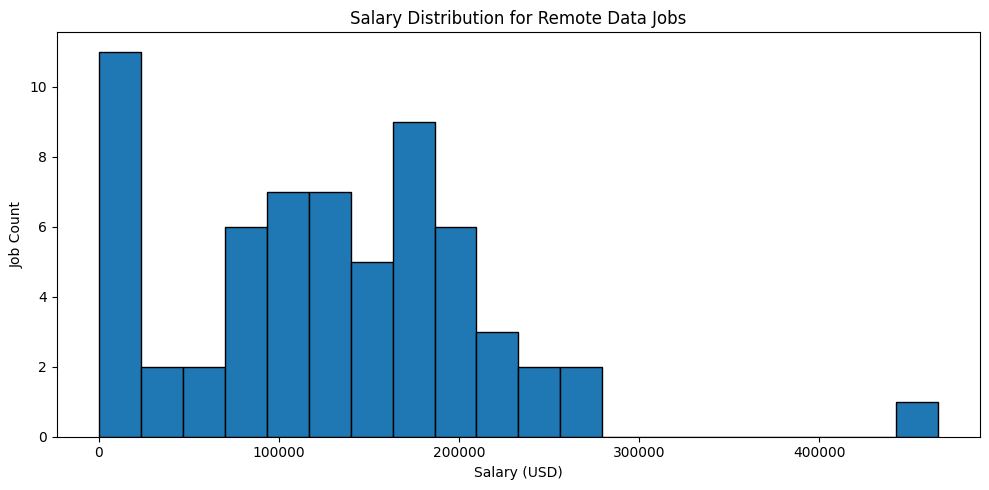

In [4]:
#Step 4: Analyze Salary Trends

# Filter salary data
def parse_salary(salary_str):
    nums = re.findall(r'\d+', salary_str.replace(",", ""))
    return (int(nums[0]) + int(nums[1])) / 2 if len(nums) >= 2 else (int(nums[0]) if nums else None)

df_salaries = df_data[df_data['salary'].str.strip() != ""].copy()
df_salaries['parsed_salary'] = df_salaries['salary'].apply(parse_salary)
df_salaries = df_salaries.dropna(subset=['parsed_salary'])

plt.figure(figsize=(10,5))
plt.hist(df_salaries['parsed_salary'], bins=20, edgecolor='k')
plt.title("Salary Distribution for Remote Data Jobs")
plt.xlabel("Salary (USD)"); plt.ylabel("Job Count"); plt.tight_layout(); plt.show()


#### Step 5: Identify Top-Paying Skills
Identifies the top-paying technical skills based on salary-tag associations and visualizes the highest average earners.

This step calculates the average salary for each skill mentioned in job tags, using the parsed salary data from Step 4. A defaultdict is used to group salaries by each skill. Only skills that appear in at least 3 job listings are considered to ensure reliability.

The result is converted into a DataFrame and sorted to find the top 10 highest-paying skills. A horizontal bar chart visualizes which technologies (e.g., Kubernetes, AWS, or Snowflake) are associated with the best-paying remote Data/ML jobs.

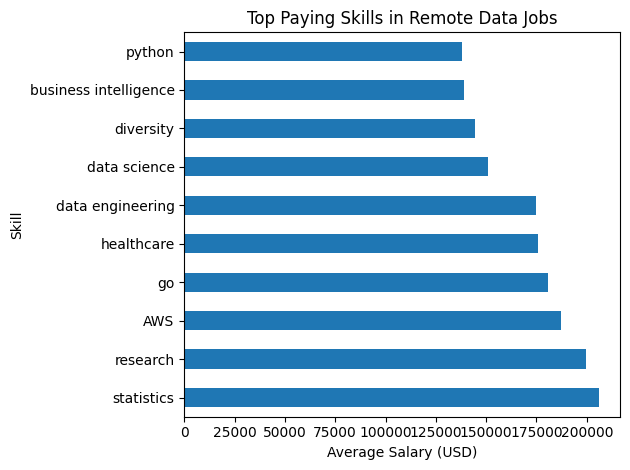

In [5]:
#Step 5: Top Paying Skills by Salary
from collections import defaultdict

skill_salaries = defaultdict(list)
for _, row in df_salaries.iterrows():
    for skill in row['tags']:
        skill_salaries[skill].append(row['parsed_salary'])

skill_avg_salary = {skill: sum(vals)/len(vals) for skill, vals in skill_salaries.items() if len(vals) >= 3}
df_skill_salary = pd.DataFrame(skill_avg_salary.items(), columns=['Skill', 'Avg_Salary'])

top_skills = df_skill_salary.sort_values(by='Avg_Salary', ascending=False).head(10)
top_skills.plot(kind='barh', x='Skill', y='Avg_Salary', title="Top Paying Skills in Remote Data Jobs", legend=False)
plt.xlabel("Average Salary (USD)"); plt.tight_layout(); plt.show()


#### Step 6: Recent Activity Trend (Last 30 Days)

Analyzes the number of job postings over the last 30 days by converting and filtering the publication_date. A bar plot shows the daily count of new remote job postings.

The code first converts the publication_date column to datetime format. It then filters the job listings to include only those posted within the past 30 days. The number of postings is grouped by each unique date and sorted chronologically.

The result is visualized using a bar chart, revealing recent hiring momentum in the remote job market. Spikes or dips in the chart may indicate periods of increased or decreased employer activity.


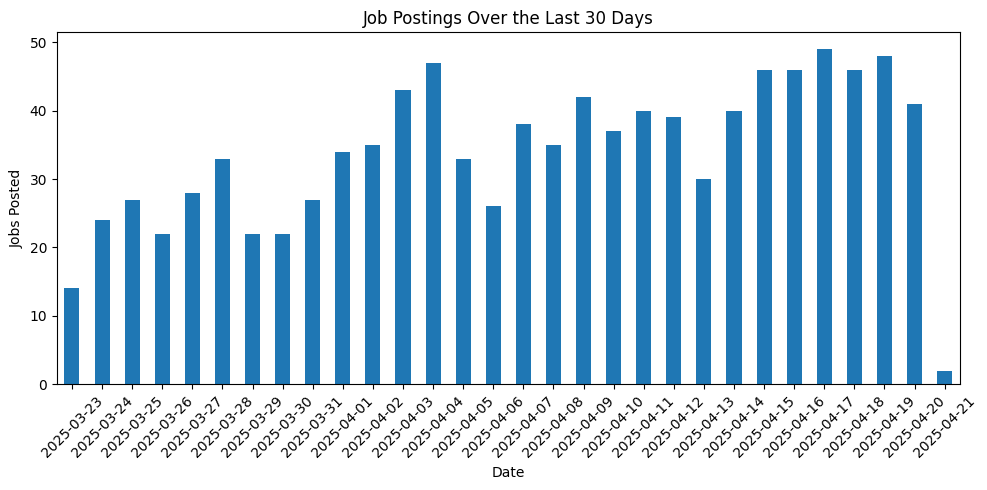

In [6]:
#Step 6: Time Trend – Last 30 Days of Jobs
df['publication_date'] = pd.to_datetime(df['publication_date'])
last_30 = df[df['publication_date'] >= datetime.now() - timedelta(days=30)]
daily_counts = last_30['publication_date'].dt.date.value_counts().sort_index()

plt.figure(figsize=(10,5))
daily_counts.plot(kind='bar')
plt.title("Job Postings Over the Last 30 Days")
plt.xlabel("Date"); plt.ylabel("Jobs Posted")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()


## Section 2: Historical Remote Jobs — Hacker News (2020–2024)

#### Step 1: Fetch HN “Who is Hiring?” Threads (2020–2024)

Fetches Hacker News 'Who is Hiring?' threads for each month between 2020–2024 using the Algolia API. It searches for stories with specific titles and stores thread metadata like title, creation date, and object ID.


In [7]:
import requests
import pandas as pd
from datetime import datetime
import time

# Step 1: Fetch HN "Who is Hiring?" Threads
def fetch_hn_who_is_hiring(year):
    results = []
    for month in range(1, 13):
        query = f"Ask HN: Who is hiring? ({datetime(year, month, 1).strftime('%B')} {year})"
        url = f"https://hn.algolia.com/api/v1/search?query={query}&tags=story"
        try:
            res = requests.get(url)
            data = res.json()
            if data.get('hits'):
                for hit in data['hits']:
                    results.append({
                        'title': hit['title'],
                        'objectID': hit['objectID'],
                        'created_at': hit['created_at'],
                        'year': year
                    })
            time.sleep(1)
        except:
            continue
    return pd.DataFrame(results)


#### Step 2:  Extract Comments from Each Thread

Fetches all job-related comments from each “Who is Hiring?” thread by calling the Hacker News API using the thread’s unique object ID.

#### Step 3: Loop Through All Years and Collect All Comments

A function is defined to retrieve child comments from each thread. Then, for every year from 2020 to 2024, the code loops through all matching threads and collects their associated comments. Each comment, along with metadata like year, thread ID, and creation date, is stored in a list.

This results in a comprehensive dataset of raw, user-submitted job listings shared in HN threads over a 5-year period.


In [8]:

# Step 2: Fetch Comments for Each Thread
def fetch_comments_for_thread(object_id):
    url = f"https://hn.algolia.com/api/v1/items/{object_id}"
    res = requests.get(url).json()
    return [c['text'] for c in res.get('children', []) if c.get('text')]

# Step 3: Loop Through All Years and Collect All Comments
all_threads = []
for year in range(2020, 2025):
    print(f"🔍 Fetching threads for {year}...")
    df_threads = fetch_hn_who_is_hiring(year)
    for _, row in df_threads.iterrows():
        comments = fetch_comments_for_thread(row['objectID'])
        for comment in comments:
            all_threads.append({
                'year': row['year'],
                'thread_id': row['objectID'],
                'created_at': row['created_at'],
                'comment_text': comment
            })
        time.sleep(1)

df_hn_jobs = pd.DataFrame(all_threads)


🔍 Fetching threads for 2020...
🔍 Fetching threads for 2021...
🔍 Fetching threads for 2022...
🔍 Fetching threads for 2023...
🔍 Fetching threads for 2024...


#### Step 4: Filter for Remote + Data/ML Jobs

Filters the raw Hacker News job comments to focus only on those relevant to remote Data/ML roles.

A keyword list is defined to include terms like “remote”, “data”, “machine learning”, “AI”, and more. These keywords are joined into a regex pattern. The comments are then filtered to include only those that match at least one of the specified keywords.

This step significantly narrows the dataset to include only relevant job postings for analysis.

In [9]:

# Step 4: Filter for Remote/Data-related Comments
keywords = ['remote', 'data', 'machine learning', 'ml', 'ai', 'analytics', 'deep learning', 'llm', 'chatgpt']
pattern = '|'.join(keywords)
df_hn_filtered = df_hn_jobs[df_hn_jobs['comment_text'].str.contains(pattern, case=False, na=False)].copy()


#### Step 5: Clean and Preprocess Comment Text

Cleans and preprocesses the raw job listing text for Natural Language Processing (NLP) by removing unnecessary content and formatting.

A function named clean_html_and_symbols() is defined to clean each comment. It uses BeautifulSoup to remove HTML tags and regex to eliminate URLs, punctuation, and extra whitespace. The result is then converted to lowercase for consistency.

This prepares the job comment text for accurate tokenization and analysis in the next steps.

In [10]:
#Fetch HN Threads and Job Comments

import re
from bs4 import BeautifulSoup
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

# Load spaCy lightweight tokenizer
nlp = spacy.blank("en")

# Step 5: Clean comment text
def clean_html_and_symbols(text):
    if pd.isna(text): return ""
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip().lower()

df_hn_filtered.loc[:, 'clean_text'] = df_hn_filtered['comment_text'].apply(clean_html_and_symbols)


#### Step 6: NLP Tokenization & Term Frequency Extraction
Tokenizes the cleaned job listing text and identifies the most frequently mentioned job-related terms using lightweight NLP.

Using a blank English spaCy model, the cleaned comment text is tokenized in batches for efficiency. Each token is filtered to remove stopwords, non-alphabetic characters, and short or irrelevant words. A frequency count is then performed across all tokens to identify the top 30 most common words.

This reveals recurring keywords in job listings, such as "python", "engineer", or "remote", which indicate popular roles or technologies.

In [11]:

# Step 6: Tokenize and count common skills/terms
tokenized_texts = list(nlp.pipe(df_hn_filtered['clean_text'].astype(str), batch_size=1000))

def is_valid_token(token):
    return token.is_alpha and len(token.text) > 2 and token.text not in STOP_WORDS

# Extract and count frequent terms
token_counter = Counter()
for doc in tokenized_texts:
    for token in doc:
        if is_valid_token(token):
            token_counter[token.text] += 1

df_top_terms = pd.DataFrame(token_counter.most_common(30), columns=["Term", "Frequency"])
print("🔍 Top Terms from HN Posts:")
print(df_top_terms.head(15))



🔍 Top Terms from HN Posts:
           Term  Frequency
0      engineer      45281
1        remote      34852
2      software      34618
3          team      31102
4          time      28524
5          data      25816
6         stack      21351
7        senior      21255
8          work      21235
9       product      19982
10    engineers      19939
11      looking      19828
12   experience      17762
13  engineering      17010
14     platform      14241


#### Step 7: Role Normalization and Year Extraction (Job Title Grouping)

Normalizes the job titles in Hacker News listings using a rule-based matching approach.

A dictionary maps commonly mentioned job role patterns (like “ml engineer” or “analytics engineer”) to standardized titles (e.g., “Machine Learning Engineer”, “Analytics Engineer”). A function extract_role() scans each job comment and assigns the appropriate standardized role. This new role is stored in the normalized_role column.

Timestamps are also cleaned and converted into datetime format to enable time-based analysis in the next steps.

In [12]:
import matplotlib.pyplot as plt

# Step 7: Define and Extract Roles
role_keywords = {
    "Data Analyst": ["data analyst", "analytics"],
    "Data Scientist": ["data scientist"],
    "Machine Learning Engineer": ["machine learning engineer", "ml engineer"],
    "Senior Data Scientist": ["senior data scientist"],
    "Senior Data Engineer": ["senior data engineer"],
    "Senior Data Analyst": ["senior data analyst"],
    "Analytics Engineer": ["analytics engineer"],
    "Senior Machine Learning Engineer": ["senior machine learning engineer"],
    "Data Steward": ["data steward"]
}

def extract_role(text):
    text = str(text).lower()
    for role, patterns in role_keywords.items():
        if any(p in text for p in patterns):
            return role
    return "Other"

# Assign normalized roles and year
df_hn_filtered.loc[:, 'normalized_role'] = df_hn_filtered['comment_text'].apply(extract_role)
df_hn_filtered['created_at'] = pd.to_datetime(df_hn_filtered['created_at'], errors='coerce')
df_hn_filtered.dropna(subset=['created_at'], inplace=True)
df_hn_filtered['year'] = df_hn_filtered['created_at'].dt.year


### Time Trend Analysis
#### Step 8: Visualize Most Common Job Roles
Identifies and visualizes the most common job roles mentioned in Hacker News listings.

The frequency of each normalized role is calculated, and the top 10 roles (excluding “Other”) are plotted as a horizontal bar chart. This shows which remote Data/ML roles were most frequently advertised in HN posts from 2020–2024.

#### Step 9: Analyze Yearly Posting Trends
Plots the yearly trend of Hacker News job postings mentioning remote Data/ML roles from 2020 to 2024.

The dataset is grouped by year using the cleaned created_at timestamps, and the number of job-related comments per year is visualized in a line plot. This shows hiring activity and growth trends over time, helping to identify patterns or shifts in the remote data job market.

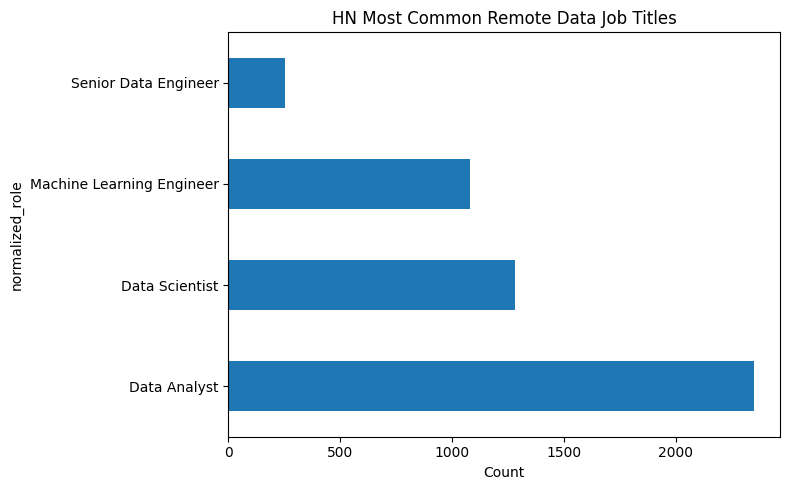

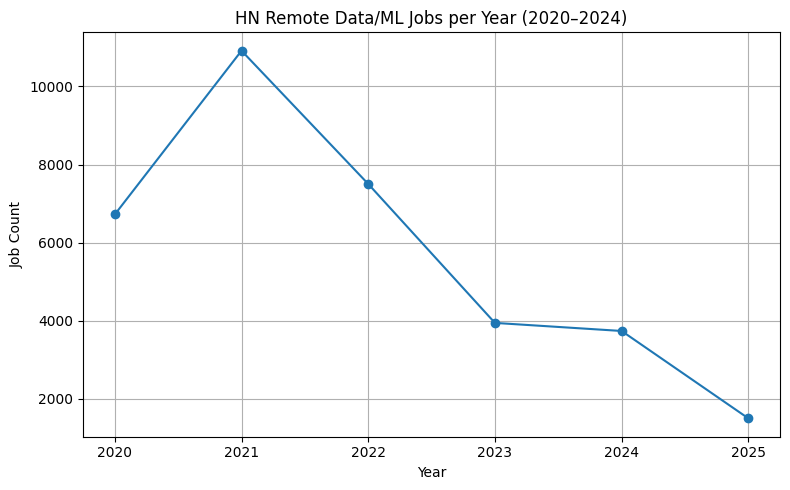

In [13]:

# Step 8: Plot Top Roles
role_counts = df_hn_filtered['normalized_role'].value_counts().drop("Other", errors='ignore').head(10)
role_counts.plot(kind='barh', figsize=(8, 5), title="HN Most Common Remote Data Job Titles")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

# Step 9: Plot Yearly Trend
yearly_counts = df_hn_filtered['year'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
yearly_counts.plot(kind='line', marker='o', title='HN Remote Data/ML Jobs per Year (2020–2024)')
plt.ylabel("Job Count")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()



## Section 3: Summary of Insights & Comparison
This section summarizes key findings and contrasts between the two sources of remote job data analyzed:

- **Remotive API (2024)** — Real-time, structured corporate job listings

- **Hacker News "Who is Hiring?" Threads (2020–2024)** — Community-sourced, unstructured historical posts

---

### Roles: Structure vs. Flexibility

- **Remotive** featured structured and role-specific job titles (formal) such as:
  - *Senior Data Scientist*
  - *Data Analyst*
  - *Analytics Engineer*

- **HN Threads** leaned more toward flexible, engineering-focused (informal) roles:
  - *Data Analyst*
  - *Data Scientist*
  - *Machine Learning Engineer*
  - *Senior Data Engineer*

> Insight: Remotive reflects corporate hiring pipelines, while HN captures startup culture and niche roles.

---

### Skills: Structured Tags vs. Natural Language

- **Remotive** emphasized structured skills via job tags:  
  `SQL`, `Python`, `Data Visualization`, `Analytics`, `AWS`, `Tableau`

- **HN** extracted terms from free-form text using NLP:  
  Top mentions included `engineer`, `remote`, `data`, `product`, `platform`

> Insight: Remotive tags offer immediate clarity for skills in demand; HN required advanced processing (tokenization + filtering) but revealed broader context of real-world job language.

---

### Salary Trends

- **Remotive** salary data was available in a standardized field, parsed with regex and analyzed for:
  - **Salary Range Observed:** ~ 0 to 450,000 USD (wide range with concentration between 60,000 USD and 180,000 USD)
  - **Top Paying Skills:** *Statistics*, *Research*, *AWS*, *Go*

- **HN** Threads lacked structured salary info, limiting direct comparisons.

> Insight: Use Remotive for quantitative salary analysis; use HN for qualitative trend exploration.

---

### Time Trend (HN Only: 2020–2024)

- A **peak in 2021** was observed in HN job posts — likely due to the COVID-remote boom.
- **Decline** in 2022–2024 reflects the market correction, layoffs, and hiring freezes (possibly due to market slowdowns).
- Early 2024 shows signs of **AI-specific demand** (mentions of GPT, LLMs increased) which is a recovery trend.

> Insight: Historical data shows real-world hiring cycles and tech trend evolution over time. Time series analysis gives macro-level hiring dynamics across years, which complements Remotive’s real-time view.

---

### Key Quantitative Insights

- **Top job title (Remotive):** "Senior Data Scientist"  
- **Most frequent HN term:** "engineer"
- **Highest avg. paying skill (Remotive):** "Statistics"
- **Peak year (HN posts):** "2021"

---

### Limitations

- HN posts often lacked structure (no standardized salary, inconsistent role naming)
- NLP could not always separate signal from noise in multi-topic posts
- Remotive data skews toward more established firms, missing early-stage startups

---

### Practical Applications

- **Job Seekers:** Identify high-paying skills and trending roles to upskill accordingly  
- **Recruiters:** Compare current vs. historical demand for remote Data/ML positions  
- **Educators:** Design curricula around in-demand tech (Python, cloud, analytics)

---

### Final Conclusion
> **Combining structured APIs and community forums paints a richer, layered view of the remote tech job landscape.**

Remotive gives us a **current, structured snapshot** of remote Data/ML roles in 2024.  
Hacker News, on the other hand, provides a **longitudinal, community-driven lens** into hiring shifts from 2020–2024.

Together, they highlight how remote Data/ML job demand has:

- Shifted from generalized engineering roles to specialized analytics/science positions
- Evolved in required skills (from SQL-heavy to cloud-native and AI-aware stacks)
- Reacted to macro trends like COVID, tech layoffs, and generative AI growth